In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('fer2013.csv')
#print(df.head())

all_pixels = df.pixels.values
pixels = []
for p in all_pixels:
  j=list(map(float,p.split(" ")))
  pixels.append(j)

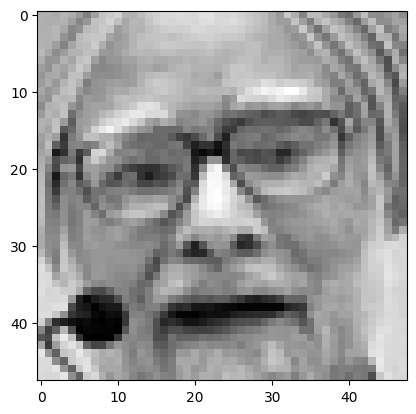

In [4]:
images = []
for image in pixels:
  img = np.array([image], dtype="float32")
  img.reshape(48,48,1)
  images.append(img)

all_images = np.array(images)
all_images = all_images.reshape((-1, 48, 48, 1))
all_images = all_images.astype('float32') / 255.0

plt.imshow(all_images[1],cmap = "gray")
plt.show()

In [5]:
labels = df.emotion.values
append_labels = []
for label in labels:
  append_labels.append(int(label))
append_labels = np.array([append_labels], dtype="int")
all_labels = append_labels[0]
print(all_labels.shape)

(35887,)


In [6]:
from keras.utils import to_categorical
train_size = int(len(df)*0.7)
test_size = int(len(df)*3)

x_train = all_images[:train_size]
y_train = all_labels[:train_size]

x_test = all_images[train_size:]
y_test = all_labels[train_size:]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


(25120, 48, 48, 1) (25120, 7)
(10767, 48, 48, 1) (10767, 7)
(48, 48, 1)


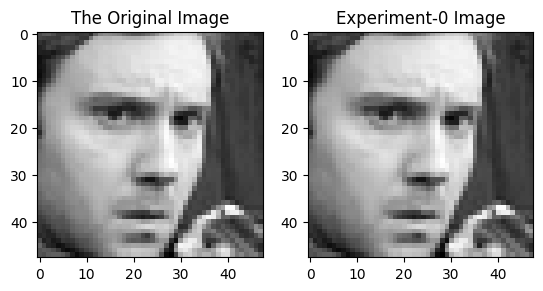

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_test[10].shape)
fig, axs = plt.subplots(1,2)
axs[0].imshow(all_images[0], cmap="gray")
axs[0].set_title("The Original Image")
axs[1].imshow(x_train[0], cmap="gray")
axs[1].set_title("Experiment-0 Image")
plt.show()

(25120, 48, 48, 1)
(10767, 48, 48, 1)


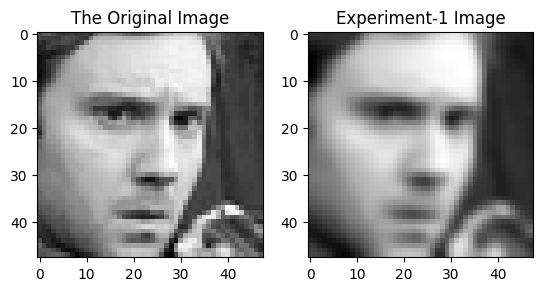

In [8]:
blurx_train = []
for image in x_train:
  blur_image = cv2.GaussianBlur(image, (5, 5), 0)
  blurx_train.append(blur_image.reshape(48,48,1))
blurx_train = np.array(blurx_train)
print(blurx_train.shape)

blurx_test = []
for image in x_test:
  blur_image = cv2.GaussianBlur(image, (5, 5), 0)
  blurx_test.append(blur_image.reshape(48,48,1))
blurx_test = np.array(blurx_test)
print(blurx_test.shape)
fig, axs = plt.subplots(1,2)
axs[0].imshow(all_images[0], cmap="gray")
axs[0].set_title("The Original Image")
axs[1].imshow(blurx_train[0], cmap="gray")
axs[1].set_title("Experiment-1 Image")
plt.show()

(25120, 48, 48, 1)
(10767, 48, 48, 1)


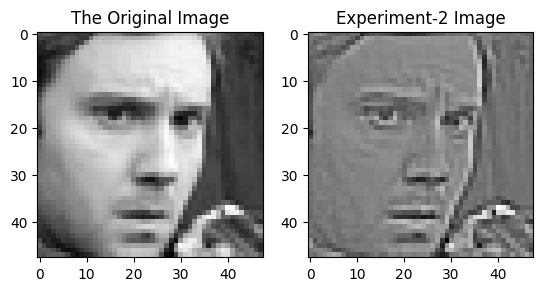

In [9]:
sharpx_train = []
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
for image in x_train:
  sharp_image = cv2.filter2D(image, -1, kernel)
  sharpx_train.append(sharp_image.reshape(48,48,1))
sharpx_train = np.array(sharpx_train)
print(sharpx_train.shape)

sharpx_test = []
for image in x_test:
  sharp_image = cv2.filter2D(image, -1, kernel)
  sharpx_test.append(sharp_image.reshape(48,48,1))
sharpx_test = np.array(sharpx_test)
print(sharpx_test.shape)
fig, axs = plt.subplots(1,2)
axs[0].imshow(all_images[0], cmap="gray")
axs[0].set_title("The Original Image")
axs[1].imshow(sharpx_train[0], cmap="gray")
axs[1].set_title("Experiment-2 Image")
plt.show()

(25120, 48, 48, 1)
(10767, 48, 48, 1)


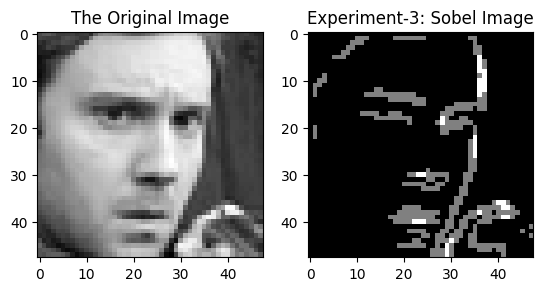

In [11]:
sobelx_train = []
for image in x_train:
  sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  sobel_image = np.sqrt(sobelx**2 + sobely**2)
  sobel_image = np.uint8(sobel_image)
  sobelx_train.append(sobel_image.reshape(48,48,1))
sobelx_train = np.array(sobelx_train)
print(sobelx_train.shape)

sobelx_test = []
for image in x_test:
  sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  sobel_image = np.sqrt(sobelx**2 + sobely**2)
  sobel_image = np.uint8(sobel_image)
  sobelx_test.append(sobel_image.reshape(48,48,1))
sobelx_test = np.array(sobelx_test)
print(sobelx_test.shape)
fig, axs = plt.subplots(1,2)
axs[0].imshow(all_images[0], cmap="gray")
axs[0].set_title("The Original Image")
axs[1].imshow(sobelx_train[0], cmap="gray")
axs[1].set_title("Experiment-3: Sobel Image")
plt.show()

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 12)        120       
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 24)        5208      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 24)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2400)             

In [39]:
history = model.fit(x=x_train,y=y_train, batch_size=314, epochs= 10, verbose = 1, callbacks = None, validation_data=(x_test,y_test), shuffle=False, workers=1, use_multiprocessing=False)

Epoch 1/10
80/80 [==============================] - 64s 790ms/step - loss: 1.7088 - accuracy: 0.3172 - val_loss: 1.5555 - val_accuracy: 0.3980
Epoch 2/10
80/80 [==============================] - 62s 777ms/step - loss: 1.5083 - accuracy: 0.4252 - val_loss: 1.4699 - val_accuracy: 0.4359
Epoch 3/10
80/80 [==============================] - 62s 776ms/step - loss: 1.4135 - accuracy: 0.4611 - val_loss: 1.4003 - val_accuracy: 0.4622
Epoch 4/10
80/80 [==============================] - 62s 779ms/step - loss: 1.3451 - accuracy: 0.4893 - val_loss: 1.3630 - val_accuracy: 0.4779
Epoch 5/10
80/80 [==============================] - 62s 774ms/step - loss: 1.2955 - accuracy: 0.5095 - val_loss: 1.3404 - val_accuracy: 0.4880
Epoch 6/10
80/80 [==============================] - 62s 771ms/step - loss: 1.2470 - accuracy: 0.5289 - val_loss: 1.3087 - val_accuracy: 0.4997
Epoch 7/10
80/80 [==============================] - 62s 779ms/step - loss: 1.1958 - accuracy: 0.5509 - val_loss: 1.2903 - val_accuracy: 0.5071

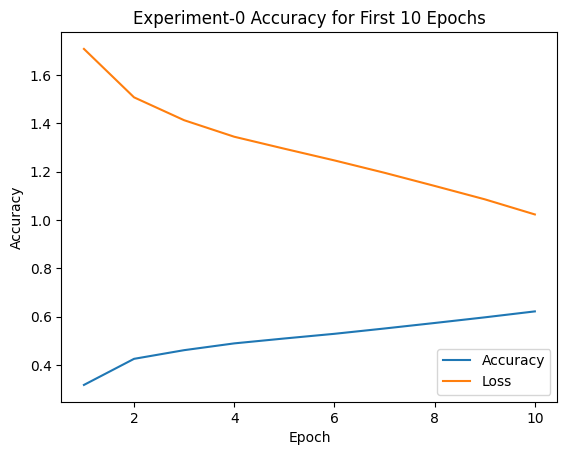

In [41]:
loss = history.history["loss"]
acc = history.history["accuracy"]
epochs = range(1, 11)

plt.plot(epochs, acc[:10], label='Accuracy')
plt.plot(epochs, loss[:10], label='Loss')
plt.title('Experiment-0 Accuracy for First 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

blur_model = keras.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')
])
blur_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

blur_history = blur_model.fit(x=blurx_train,y=y_train, batch_size=314, epochs= 10, verbose = 1, callbacks = None, validation_data=(blurx_test,y_test), shuffle=False, workers=1, use_multiprocessing=False)

Epoch 1/10
80/80 [==============================] - 64s 798ms/step - loss: 1.7221 - accuracy: 0.3078 - val_loss: 1.6201 - val_accuracy: 0.3678
Epoch 2/10
80/80 [==============================] - 65s 818ms/step - loss: 1.5609 - accuracy: 0.3989 - val_loss: 1.5191 - val_accuracy: 0.4115
Epoch 3/10
80/80 [==============================] - 62s 774ms/step - loss: 1.4766 - accuracy: 0.4330 - val_loss: 1.4543 - val_accuracy: 0.4347
Epoch 4/10
80/80 [==============================] - 62s 777ms/step - loss: 1.4106 - accuracy: 0.4573 - val_loss: 1.4078 - val_accuracy: 0.4585
Epoch 5/10
80/80 [==============================] - 62s 771ms/step - loss: 1.3545 - accuracy: 0.4829 - val_loss: 1.3806 - val_accuracy: 0.4738
Epoch 6/10
80/80 [==============================] - 62s 774ms/step - loss: 1.3014 - accuracy: 0.5066 - val_loss: 1.3644 - val_accuracy: 0.4820
Epoch 7/10
80/80 [==============================] - 66s 822ms/step - loss: 1.2477 - accuracy: 0.5307 - val_loss: 1.3598 - val_accuracy: 0.4829

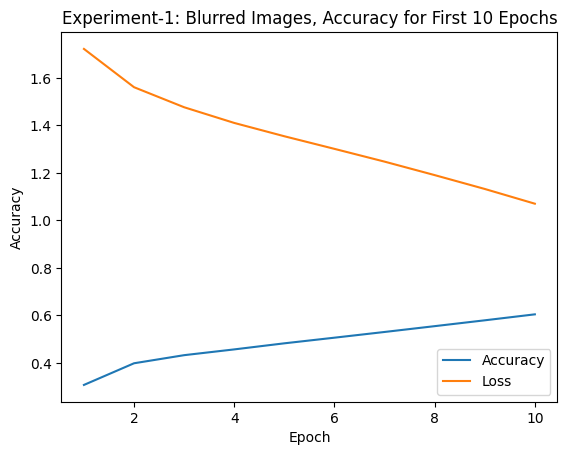

In [47]:
blur_loss = blur_history.history["loss"]
blur_acc = blur_history.history["accuracy"]
blur_epochs = range(1, 11)

plt.plot(blur_epochs, blur_acc[:10], label='Accuracy')
plt.plot(blur_epochs, blur_loss[:10], label='Loss')
plt.title('Experiment-1: Blurred Images, Accuracy for First 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sharp_model = keras.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')
])
sharp_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
sharp_history = sharp_model.fit(x=sharpx_train,y=y_train, batch_size=314, epochs= 10, verbose = 1, callbacks = None, validation_data=(sharpx_test,y_test), shuffle=False, workers=1, use_multiprocessing=False)

Epoch 1/10
80/80 [==============================] - 64s 785ms/step - loss: 1.6486 - accuracy: 0.3531 - val_loss: 1.5018 - val_accuracy: 0.4152
Epoch 2/10
80/80 [==============================] - 66s 833ms/step - loss: 1.3983 - accuracy: 0.4701 - val_loss: 1.3897 - val_accuracy: 0.4656
Epoch 3/10
80/80 [==============================] - 62s 771ms/step - loss: 1.2784 - accuracy: 0.5194 - val_loss: 1.3250 - val_accuracy: 0.4923
Epoch 4/10
80/80 [==============================] - 62s 775ms/step - loss: 1.1717 - accuracy: 0.5634 - val_loss: 1.2902 - val_accuracy: 0.5080
Epoch 5/10
80/80 [==============================] - 67s 835ms/step - loss: 1.0631 - accuracy: 0.6096 - val_loss: 1.2907 - val_accuracy: 0.5114
Epoch 6/10
80/80 [==============================] - 65s 821ms/step - loss: 0.9559 - accuracy: 0.6529 - val_loss: 1.3068 - val_accuracy: 0.5142
Epoch 7/10
80/80 [==============================] - 61s 767ms/step - loss: 0.8526 - accuracy: 0.6921 - val_loss: 1.3789 - val_accuracy: 0.5094

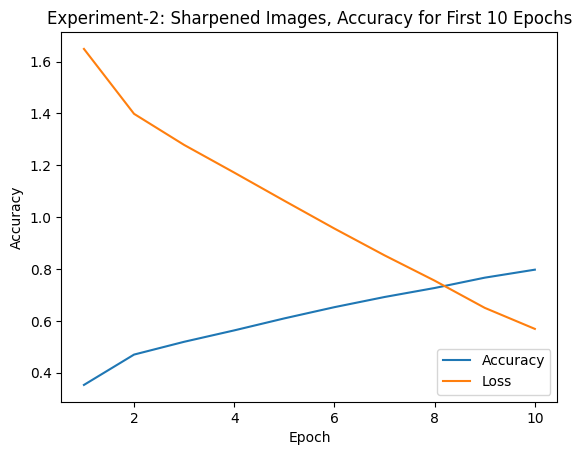

In [49]:
sharp_loss = sharp_history.history["loss"]
sharp_acc = sharp_history.history["accuracy"]
sharp_epochs = range(1, 11)

plt.plot(sharp_epochs, sharp_acc[:10], label='Accuracy')
plt.plot(sharp_epochs, sharp_loss[:10], label='Loss')
plt.title('Experiment-2: Sharpened Images, Accuracy for First 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sobel_model = keras.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')
])
sobel_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

sobel_history = sobel_model.fit(x=sobelx_train,y=y_train, batch_size=10, epochs= 10, verbose = 1, callbacks = None, validation_data=(sobelx_test,y_test), shuffle=False, workers=1, use_multiprocessing=False)

Epoch 1/10
2512/2512 [==============================] - 89s 35ms/step - loss: 1.6147 - accuracy: 0.3637 - val_loss: 1.5134 - val_accuracy: 0.4149
Epoch 2/10
2512/2512 [==============================] - 84s 34ms/step - loss: 1.4080 - accuracy: 0.4576 - val_loss: 1.4878 - val_accuracy: 0.4292
Epoch 3/10
2512/2512 [==============================] - 85s 34ms/step - loss: 1.0912 - accuracy: 0.5970 - val_loss: 1.7158 - val_accuracy: 0.4191
Epoch 4/10
2512/2512 [==============================] - 85s 34ms/step - loss: 0.6092 - accuracy: 0.7859 - val_loss: 2.4234 - val_accuracy: 0.4182
Epoch 5/10
2512/2512 [==============================] - 86s 34ms/step - loss: 0.2930 - accuracy: 0.8998 - val_loss: 3.3303 - val_accuracy: 0.4061
Epoch 6/10
2512/2512 [==============================] - 85s 34ms/step - loss: 0.2206 - accuracy: 0.9233 - val_loss: 3.5728 - val_accuracy: 0.4118
Epoch 7/10
2512/2512 [==============================] - 85s 34ms/step - loss: 0.1762 - accuracy: 0.9408 - val_loss: 3.9282 -

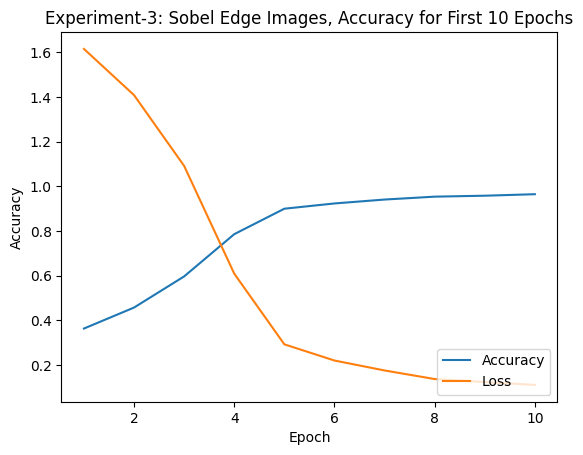

In [50]:
sobel_loss = sobel_history.history["loss"]
sobel_acc = sobel_history.history["accuracy"]
sobel_epochs = range(1, 11)

plt.plot(sobel_epochs, sobel_acc[:10], label='Accuracy')
plt.plot(sobel_epochs, sobel_loss[:10], label='Loss')
plt.title('Experiment-3: Sobel Edge Images, Accuracy for First 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

[1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 15ms/step

Predicted Class Experiment-0: Angry

Predicted Class Experiment-1: Angry

Predicted Class Experiment-2: Angry

Predicted Class Experiment-3: Sad


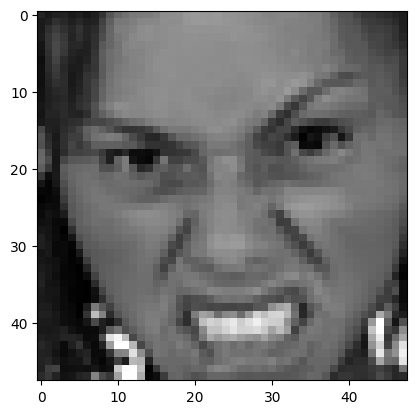

In [56]:
i=243
img = np.reshape(x_test[i], (1, 48, 48, 1))
print(y_test[i])
pred = model.predict(img)
pred_exp1 = blur_model.predict(img)
pred_exp2 = sharp_model.predict(img)
pred_exp3 = sobel_model.predict(img)
class_idx = np.argmax(pred, axis=1)[0]
class_idx_e1 = np.argmax(pred_exp1, axis=1)[0]
class_idx_e2 = np.argmax(pred_exp2, axis=1)[0]
class_idx_e3 = np.argmax(pred_exp3, axis=1)[0]
labels = ["Angry","Disgust","Fear", "Happy", "Sad", "Surprise", "Neutral"]
print('\nPredicted Class Experiment-0:',labels[class_idx])
print('\nPredicted Class Experiment-1:',labels[class_idx_e1])
print('\nPredicted Class Experiment-2:',labels[class_idx_e2])
print('\nPredicted Class Experiment-3:',labels[class_idx_e3])
plt.imshow(img.reshape(48,48,1),cmap="gray")
plt.show()

The video processing part has been removed from the code because of its processing time. However, output videos are included in the submission folder.

In [62]:
#Example of label conversion
Positive_emotions = ["Neutral", "Happy", "Surprised"]
Negative_emotions = ["Angry", "Sad", "Fear", "Disgust"]
p=0
n=0
Top_classes = [[91,"Sad"], [43, "Angry"], [32, "Neutral"]]
for count, label in Top_classes:
  if label in Positive_emotions:
    p+=1
  else:
    n+=1
satisfaction = 0
if p>n:
  satisfaction = 5 - n
elif n<p:
  satisfaction = satisfaction + p
else:
  satisfaction = 3

print("Customer Satisfaction:", satisfaction)

Customer Satisfaction: 3
